<img src='python-logo-master-v3-TM.png'></img>

<font face='Verdana' size=2 color='#3c3c3c'>
<h1> Python Introduction </h1>
<h4> The Basics </h4>
<ul>
    <li> Environment </li>
    <li> Markdown </li>
    <li> Importing Modules </li>
    <ul><li>Pandas</li>
        <li>Matplotlib</li>
        <li>Seaborn</li>
        <li>sklearn</li>
    </ul>
    </ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<font face='Verdana' size=2 color='#3c3c3c'>
<h4> Importing Data </h4>
<ul>
    <li> Importing CSV </li>
    <li> Other data types </li>
    <li> Other data sources </li>
    <ul><li> Pyathena, PyODBC, SQLAlchemy, requests, Selenium </li>

In [2]:
# basic data import of excel file - pandas as many methods of importing, i.e. read_csv, read_parquet
data = pd.read_excel('titanic.xls')

In [3]:
# fastest way of viewing the size. return is rows, columns
data.shape

(1309, 14)

<font face='Verdana' size=2 color='#3c3c3c'>
<h4> Head/Tail </h4>
Viewing the head/tail will give you an immediate idea of data quality
i.e. if you only looked at the head (first 5 rows) the Cabin feature would seem like it is of good quality,
    however, the tail exposes that there are missing values (and similar with home.dest)

In [4]:
# looking at the first 5 and the last 5 records - combining them using the .append() function in pandas
data.head().append(data.tail())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0000,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [5]:
# describe() gives some basic descriptive stats
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
# info will give you the data types and let you know how many null records there are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


<font face='Verdana' size=2 color='#3c3c3c'>
<h4> Data Cleanse </h4>
<ul><li> Impute nulls </li></ul>

In [7]:
# location based indexing (with .loc) allows you to set boolean filters on rows (prior to the comma) and 
# select specific columns (after the comma)
# the boolean filter here is simply the .isnull() - which will return True or False based on the value of the record
data.loc[data['age'].isnull(), :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
69,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA"
80,1,0,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S,NaN,NaN,"Roachdale, IN"
106,1,0,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,NaN,NaN,NaN


In [8]:
# .value_counts() is very handy for some quick aggregation. 
# the square bracket notation is used to isolate one column of the data set
data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [9]:
# groupby is a method of aggregation - it's the same in SQL and i think in R.
# it splits the entire data set into groups stipulated, then we take the age for each group and run an 
# aggregate function on it (mean, in this case)
age_means = data.groupby('sex')['age'].agg('mean')

In [10]:
# wrapping anything in print() will return the item
print(age_means)

sex
female    28.687071
male      30.585233
Name: age, dtype: float64


In [11]:
# using two conditions with boolean indexing to return all null age values where the sex is male.
# this is just going to return a series of all observations that are null
data.loc[(data['age'].isnull()) & 
         (data['sex'] == 'male'), 'age']

15     NaN
37     NaN
40     NaN
46     NaN
70     NaN
74     NaN
80     NaN
106    NaN
118    NaN
125    NaN
147    NaN
152    NaN
157    NaN
166    NaN
179    NaN
184    NaN
196    NaN
219    NaN
223    NaN
235    NaN
237    NaN
241    NaN
254    NaN
256    NaN
269    NaN
283    NaN
318    NaN
320    NaN
363    NaN
384    NaN
        ..
1197   NaN
1199   NaN
1200   NaN
1202   NaN
1212   NaN
1213   NaN
1214   NaN
1215   NaN
1219   NaN
1221   NaN
1241   NaN
1242   NaN
1243   NaN
1245   NaN
1246   NaN
1249   NaN
1250   NaN
1253   NaN
1255   NaN
1262   NaN
1268   NaN
1282   NaN
1283   NaN
1284   NaN
1291   NaN
1292   NaN
1293   NaN
1297   NaN
1302   NaN
1303   NaN
Name: age, Length: 185, dtype: float64

In [12]:
# the simple for loop replaces all of the null ages with the mean age that was calculated earlier
# the x is an arbitrary variable and represents every item in age_means.index (female, male)
# the line after the for statement finds all nulls for each gender separately and replaces them with the mean, separately.
# essentially, all of the code runs twice.
for x in age_means.index:
    data.loc[(data['age'].isnull()) & (data['sex'] == x), 'age'] = age_means[x]

In [13]:
# this code is doing a very similar thing as above. replacing the embarked with the mode
# the only difference really is that i've split out the boolean filters to make the code more reasonable
embarked_nulls = data['embarked'].isnull()
embarked_mode = data['embarked'].mode()
data.loc[embarked_nulls, 'embarked'] = embarked_mode

<font face='Verdana' size=2 color='#3c3c3c'>
<h4> Explore the data </h4>
<ul><li> More grouping </li>
    <li> Pivots </li>


In [14]:
# .columns returns the columns attribute of a dataframe... which is a list of the columns
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [15]:
# more groupby - understanding the mean survival rate of each pclass
# this is giving us an idea about which features will be a good predictor
data.groupby('pclass')['survived'].agg('mean')

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

In [16]:
# more groupby - understanding the mean survival reate of each gender
# again, this is giving us an idea about which features will be a good predictor
# (the indicator for this is high variance between the groups)
data.groupby('sex')['survived'].agg('mean')

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

<font face='Verdana' size=2 color='#3c3c3c'>
<h4> Binning the data </h4>
This is technically a feature engineering task but will fit in well here...<br>
Binning is the process of turning a continuous variable into a collection of discrete groups

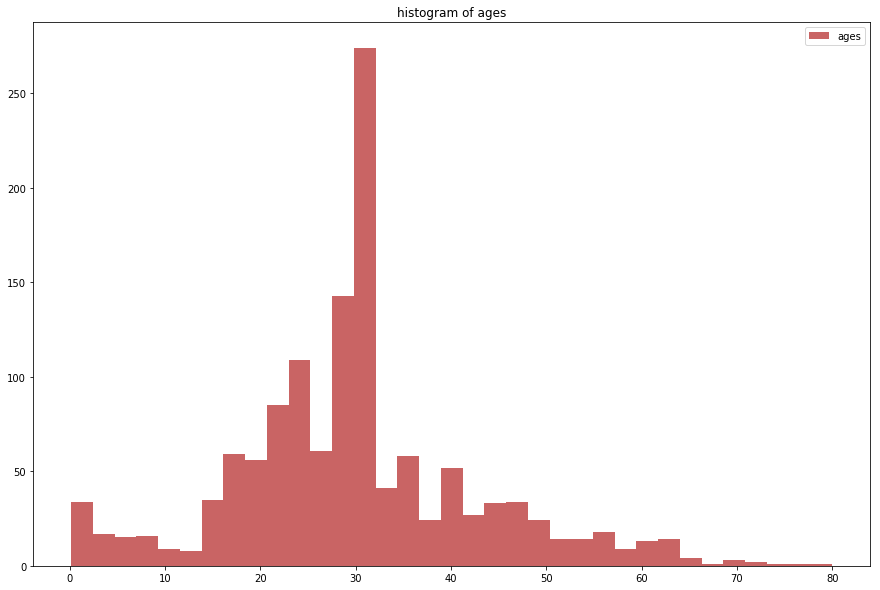

In [17]:
# first using matplotlib to plot a histogram which helps inform us what the bin sizes should be
# we're looking for discrete divisions (groups around spikes)
plt.figure(figsize=(15,10))
plt.title('histogram of ages')

plt.hist(data['age'], label=('ages'), color='firebrick', alpha=0.7, bins=35)
plt.legend()
plt.show()

In [18]:
# here we're creating the bins
# the cut values (in sequence) are the boundaries for the groups. i.e. group 1 is -1 to 5, group 2 is 5 to 12 and so on
cut_values = [-1, 5, 12, 19, 31, 50, np.inf]

# we'll use the labels to give descriptive names to the groups
# because we're mapping two values together its easiest to use a dictionary 
labels = {0: 'toddlers',
          1: 'children',
          2: 'teenagers',
          3: 'young adults',
          4: 'adults',
          5: 'elders'
}

# this is the function that cuts the data by the defined groups, the replace function below replaces
# the inital labels with the labels that we have in the dictionary above
data['age_bin'] = pd.cut(data['age'], bins=cut_values, labels=labels)
data['age_bin'] = data['age_bin'].replace(labels)

In [19]:
# exploring the new binned data.  it's not very well balanced with the majority of passengers in the 
# young adults section.  as this is sits around the mean value it might impact the performance of the model
# would suggest adding in an additional bin (maybe 19-25, 25-33)
data['age_bin'].value_counts()

young adults    672
adults          317
teenagers       131
elders           95
toddlers         56
children         38
Name: age_bin, dtype: int64

In [20]:
# the pivot is a simple way of seeing how multiple variables interact
# here we see the % that survived by group
data.pivot_table(index="age_bin", values="survived")

,survived
age_bin,
adults,0.406940
children,0.447368
elders,0.400000
teenagers,0.396947
toddlers,0.660714
young adults,0.337798


<font face='Verdana' size=2 color='#3c3c3c'>
<h4> Some basic visualisation </h4>
    <ul>
    <li> Matplotlib </li>
    <ul><li> Bar plots </li>
        <li> Histogram </li>
        <li> Heatmap </li>
    </ul>
    </ul>
The key with any visualisation is to make the image immediately interpretable. Keep them simple and succinct

In [21]:
# creating a new dataset showing the survival rate by gender for visualisation
gender_survival = data.groupby(['sex','survived'])['survived'].count()

In [22]:
# displaying the contents of the variable
print(gender_survival)

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64


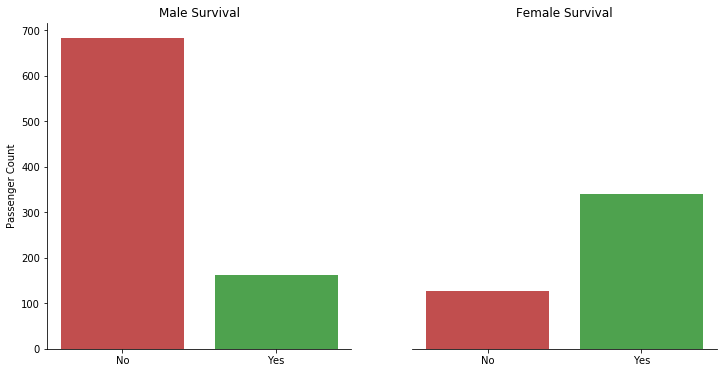

In [23]:
# using matplotlib subplots to show two charts side by side - first line sets the subplots up and
# sets them to share the y axis
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12,6), sharey=True)

# this is just removing the borders of the plot - getting rid of anything unneccesary
for ax in fig.axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# setting the colours up as variables
colors = ['firebrick', 'forestgreen']

# building the first chart on axis: ax0
ax0.set_title('Male Survival')
ax0.bar(['No','Yes'],gender_survival['male'], color=colors, alpha=0.8)
ax0.set_ylabel('Passenger Count')

# building the second chart on axis: ax1
ax1.set_title('Female Survival')
ax1.bar(['No','Yes'],gender_survival['female'], color=colors, alpha=0.8)

# this removes the left axis line and ticks on the "female survival" chart
ax1.spines['left'].set_visible(False)
ax1.tick_params(left="off")
    

plt.show()

In [24]:
# creating a new dataset showing the survival rate by class for visualisation
class_survival = data.groupby(['pclass','survived'])['survived'].count()

In [25]:
# displaying the contents of the variable
class_survival

pclass  survived
1       0           123
        1           200
2       0           158
        1           119
3       0           528
        1           181
Name: survived, dtype: int64

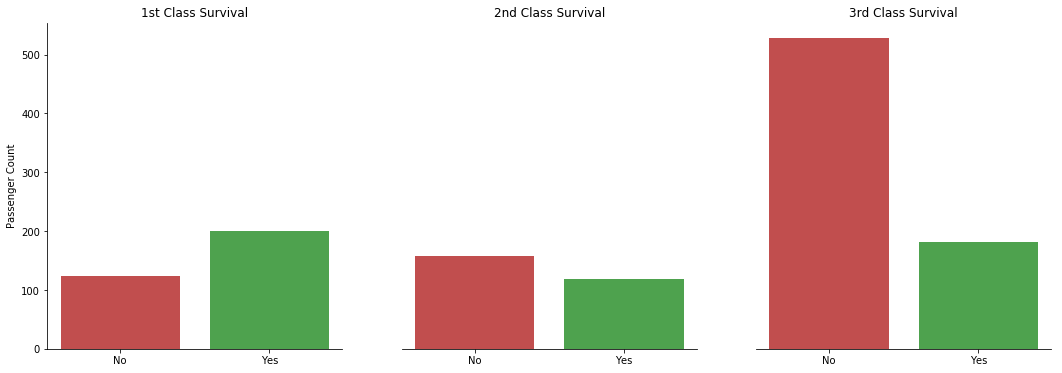

In [26]:
# as above - creating 3 individual charts all sharing the y axis for simple comparison
# this one shows clearly that 3rd class has a lot lower survival rate than the others
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(18,6), sharey=True)

for ax in fig.axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

colors = ['firebrick', 'forestgreen']

ax0.set_title('1st Class Survival')
ax0.bar(['No','Yes'],class_survival[1], color=colors, alpha=0.8)
ax0.set_ylabel('Passenger Count')

ax1.set_title('2nd Class Survival')
ax1.bar(['No','Yes'],class_survival[2], color=colors, alpha=0.8)
ax1.spines['left'].set_visible(False)
ax1.tick_params(left="off")

ax2.set_title('3rd Class Survival')
ax2.bar(['No','Yes'],class_survival[3], color=colors, alpha=0.8)
ax2.spines['left'].set_visible(False)
ax2.tick_params(left="off")


plt.show()

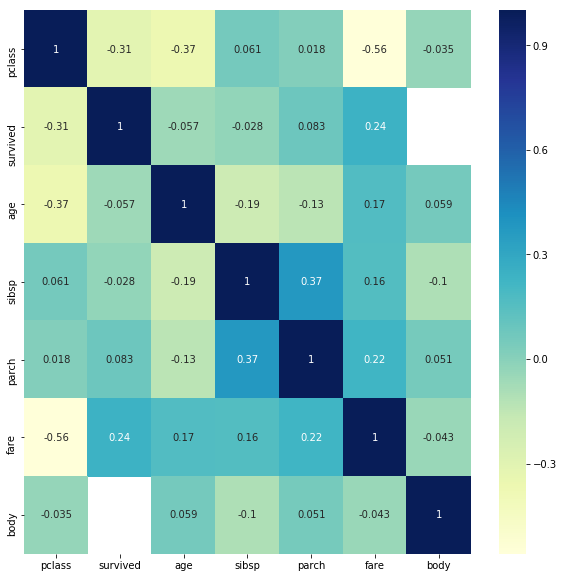

In [27]:
# displaying all of the numerical values in a heatmap.
# data.corr() is the key function here, sns.heatmap is visualising the correlation matrix.
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), 
            cmap='YlGnBu', 
            annot=True)

<font face='Verdana' size=2 color='#3c3c3c'>
<h4> Feature Engineering </h4>
<ul><li> Cutting continuous to categorical </li>
    <li> Engineering custom column for family size </li>
    <li> Dropping unusable columns </li>
    <li> One hot encoding </li>
    
-- Binning the data with the cut function happened earlier :)


In [28]:
# creating a family size feature by summing the sibsp and parch columns
data['family_size'] = data['sibsp'] + data['parch']

In [29]:
# just seeing how clean the data is and the data types so we can move forward with modelling

data.info()
# class, survived, sex, fare, embarked, age_bin
# drop name, age, ticket, cabin, boat, body, home.dest
# combine family

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
pclass         1309 non-null int64
survived       1309 non-null int64
name           1309 non-null object
sex            1309 non-null object
age            1309 non-null float64
sibsp          1309 non-null int64
parch          1309 non-null int64
ticket         1309 non-null object
fare           1308 non-null float64
cabin          295 non-null object
embarked       1307 non-null object
boat           486 non-null object
body           121 non-null float64
home.dest      745 non-null object
age_bin        1309 non-null object
family_size    1309 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [30]:
# we missed a null value in the fare field which would stop the model from running - replace with the mean.
data.loc[data['fare'].isnull(), 'fare'] = data['fare'].mean()

In [31]:
# taking a copy of the data because we're about to make a non-reversable change
model_data = data.copy()

In [32]:
# removing the columns we decided to drop, these columns are either:
# a) not valuable (ticket)
# b) been superceded (sibsp, parch, age) or
# c) will take too long to engineer given them time we have available (name, cabin)
drop_columns = ['name', 'age', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'sibsp','parch']
model_data.drop(drop_columns, axis=1, inplace=True)

In [33]:
# get_dummies on-hot-encodes the data.  
# the model will not accept pure cateogorical data so we split it out into n-1 columns each with a flag to
# indicate whether they apply or not.
# drop_first ensures we end up with n-1, this prevents multicolinearity i.e. perfectly correlating variables
model_data = pd.get_dummies(model_data, columns=['sex', 'age_bin', 'embarked'], drop_first=True)

In [34]:
# a view of what the data looks when its sparse
model_data.head()

,pclass,survived,fare,family_size,sex_male,age_bin_children,age_bin_elders,age_bin_teenagers,age_bin_toddlers,age_bin_young adults,embarked_Q,embarked_S
0,1,1,211.3375,0,0,0,0,0,0,1,0,1
1,1,1,151.5500,3,1,0,0,0,1,0,0,1
2,1,0,151.5500,3,0,0,0,0,1,0,0,1
3,1,0,151.5500,3,1,0,0,0,0,1,0,1
4,1,0,151.5500,3,0,0,0,0,0,1,0,1


<font face='Verdana' size=2 color='#3c3c3c'>
<h4> Running a prediction </h4>
<ul><li> Quickly running a basic Random Forest model </li>
    <li> Viewing model performance </li>
    <li> Optimising if we have time (we didnt...)</li>
    </ul>


In [35]:
# importing the packages that we need
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
# splitting the data into our X's (features) and y's (labels)
# if the model can see the labels then it will delivery a perfect (overfitted) prediction
X = model_data.drop('survived', axis=1)
y = model_data['survived']

In [37]:
# using the train_test_split function of sklearn to split the data into 4 sets in total
# X_train = features to train on
# X_test = features to test on
# y_train = labels to train on
# y_test = labels to test on
# the test size is 25% of the data (therefore the train is 75%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [38]:
# instantiate the model and then fit it using the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
# using the trained model against a list of features that it has not yet seen (X_test)
preds = clf.predict(X_test)

In [40]:
# using the accuracy_score function to see how the predicted values compare against the labels for that set
# of observations (y_test)
accuracy_score(preds, y_test)

0.7774390243902439

In [41]:
# using the confusion matrix function to see the results
# read it diagonally...
# top left: TRUE POSITIVES (observations that we correctly predicted as 1)
# bottom right: TRUE NEGATIVES (observations that we correctly predicted as 0)
# top right: FALSE POSITIVES (observations that we incorrectly predicted as 1)
# bottom left: FALSE NEGATIVES (observations that we incorrectly predicted as 0)
confusion_matrix(preds, y_test)

array([[176,  46],
       [ 27,  79]])

In [42]:
# showing the feature_importances_ attribute of the model to understand how it has used the data we input
clf.feature_importances_

array([0.09920261, 0.39678718, 0.08651159, 0.27043991, 0.01242723,
       0.01473402, 0.01831833, 0.02838942, 0.02883845, 0.01280239,
       0.03154887])

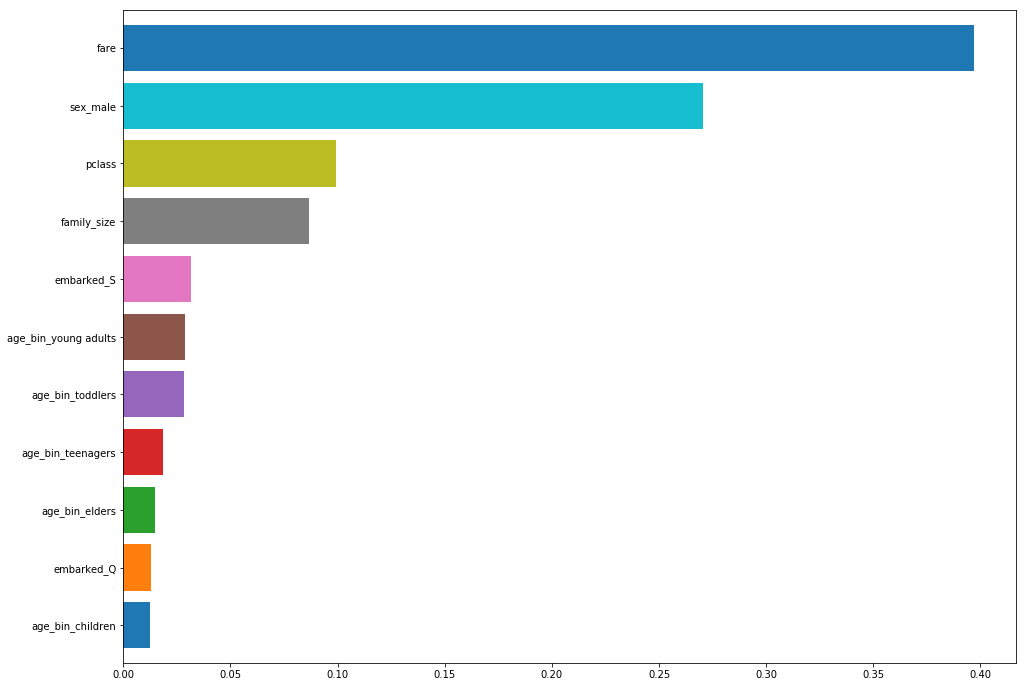

In [43]:
# graphing the feature importances

# fare is the most important, but will also almost certainly have a correlation with the Cabin feature that we 
# dropped - lower cabins would have really struggled to get to deck level and get on a lifeboat

# sex_male, also very important, this one is a negative correlation ('WOMEN AND CHILDREN FIRST!')

# pclass also as assumed from the visualisations above - there was a much better survival rate from 1st and 2nd
# class

# family size also interesting but i would assume that this has a negative effect as it gets larger. 
# maybe you can prove this? :)

pd.Series(clf.feature_importances_,
          X_train.columns).sort_values(ascending=True).plot.barh(width=0.8, figsize=(16,12))
plt.show()

<h1> Fin! </h1>
And there are the <i><b>very basics</b></i> of quickly building an analytics pipeline and machine learning model in under 2 hours from scratch!